<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig')
X_test =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test.csv", encoding = 'utf-8-sig')
Y_train= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig')
Y_test= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test.csv", encoding = 'utf-8-sig')

# **LightGBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
import lightgbm
from sklearn.model_selection import GridSearchCV
#하이퍼파라미터
lgbModel = lightgbm.LGBMRegressor()
xgb_param_grid = {'n_estimators':[10,50,100],
              'max_depth': [3,5,7,10], 
              'subsample': [0.6,0.75, 0.8, 1.0],
              'learning_rate':[0.05,0.08,0.1]}

# Create a GridSearchCV object
hr_grid = GridSearchCV(lgbModel,
                       param_grid=xgb_param_grid,
                       n_jobs=-1,
                       cv=5)

hr_grid.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:', hr_grid.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(hr_grid.best_score_))

최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.6}
최적 예측 정확도: 0.7262


In [ ]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_iterations' : 500,
    'num_leaves': 100,
    'learnnig_rage': 0.001,
    'metric': None,
    'verbose': -1,
    'stratified'  : False,
    'force_row_wise' : True,
    'monotone_penalty' : 0.5,
}

In [ ]:
# loading data
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train) 

In [ ]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,valid_sets=lgb_eval
                , early_stopping_rounds=50)

[1]	valid_0's l2: 7.0473
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 6.05062
[3]	valid_0's l2: 5.24943
[4]	valid_0's l2: 4.59849
[5]	valid_0's l2: 4.06415
[6]	valid_0's l2: 3.60953
[7]	valid_0's l2: 3.26029
[8]	valid_0's l2: 2.98103
[9]	valid_0's l2: 2.75779
[10]	valid_0's l2: 2.5707
[11]	valid_0's l2: 2.43849
[12]	valid_0's l2: 2.32561
[13]	valid_0's l2: 2.24872
[14]	valid_0's l2: 2.19192
[15]	valid_0's l2: 2.11563
[16]	valid_0's l2: 2.08354
[17]	valid_0's l2: 2.05578
[18]	valid_0's l2: 1.99691
[19]	valid_0's l2: 1.98151
[20]	valid_0's l2: 1.97314
[21]	valid_0's l2: 1.95863
[22]	valid_0's l2: 1.95671
[23]	valid_0's l2: 1.95792
[24]	valid_0's l2: 1.96152
[25]	valid_0's l2: 1.95066
[26]	valid_0's l2: 1.94794
[27]	valid_0's l2: 1.95637
[28]	valid_0's l2: 1.98508
[29]	valid_0's l2: 1.97008
[30]	valid_0's l2: 1.97295
[31]	valid_0's l2: 1.9795
[32]	valid_0's l2: 2.00923
[33]	valid_0's l2: 1.99564
[34]	valid_0's l2: 1.99507
[35]	valid_0's l2: 2.02265
[36]	

In [ ]:
# prediction
Y_pred = model.predict(X_test)

# accuracy check
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**(0.5)
rsquare = r2_score(Y_test, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R^2: %.2f" % rsquare) 

MSE: 1.95
RMSE: 1.40
R^2: 0.76


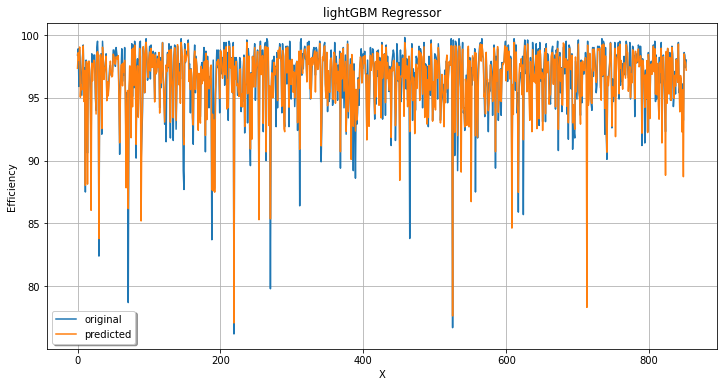

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("lightGBM Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

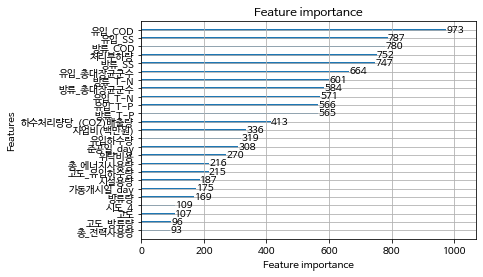

In [ ]:
# plotting feature importance
lgb.plot_importance(model,max_num_features=25)

In [ ]:
X_testH = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_high(기존모델에test).csv", encoding = 'utf-8-sig')
X_testL =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_low(기존모델에test).csv", encoding = 'utf-8-sig')
Y_testH= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_high(기존모델에test).csv", encoding = 'utf-8-sig')
Y_testL= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_low(기존모델에test).csv", encoding = 'utf-8-sig')

In [ ]:
# prediction
Y_pred = model.predict(X_testH)

# accuracy check
mse = mean_squared_error(Y_testH, Y_pred)
rmse = mse**(0.5)
rsquare = r2_score(Y_testH, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R^2: %.2f" % rsquare) 

MSE: 1.58
RMSE: 1.26
R^2: 0.65


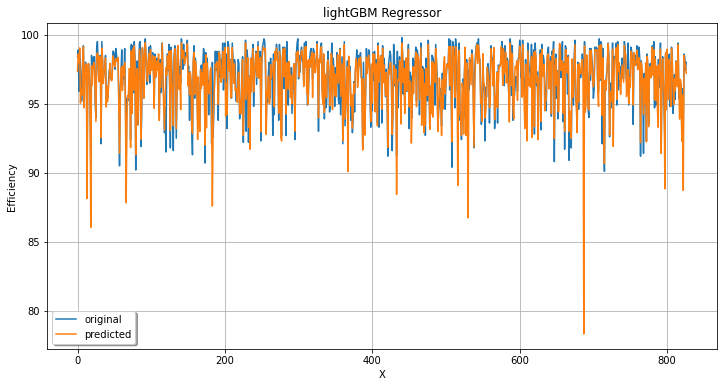

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_testH))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_testH, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("lightGBM Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
# prediction
Y_pred = model.predict(X_testL)

# accuracy check
mse = mean_squared_error(Y_testL, Y_pred)
rmse = mse**(0.5)
rsquare = r2_score(Y_testL, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R^2: %.2f" % rsquare) 

MSE: 13.73
RMSE: 3.71
R^2: 0.18


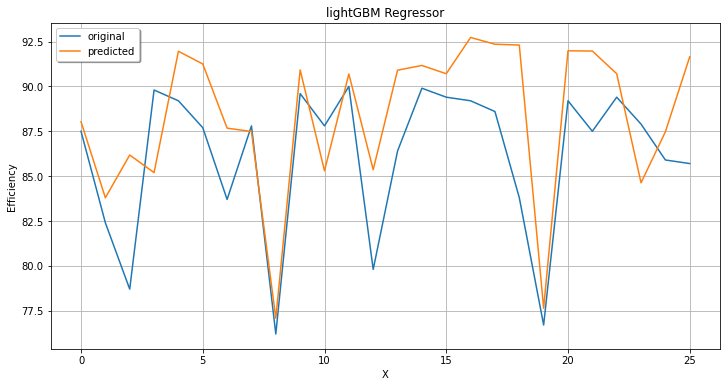

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_testL))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_testL, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("lightGBM Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# **CrossValidation**

In [ ]:
cv_results = lgb.cv(params, lgb_train, stratified=False)
print(cv_results['l2-mean'])

[44.67269802117202, 39.55405350732666, 35.39213564602254, 31.968996746255424, 29.107149187781623, 26.76136651908923, 24.600101102413237, 22.717092308125665, 21.026277643471246, 19.640585923126924, 18.35388825686571, 17.157895037471526, 16.143882277394955, 15.264118571149032, 14.505251812623987, 13.774353578830063, 13.06287956479812, 12.498872303931545, 12.003515690002983, 11.51090725098696, 11.026972207632877, 10.641501713530735, 10.246246928302982, 9.906345652590621, 9.596447349265217, 9.303850552621268, 9.055202660401935, 8.785008387721396, 8.57360575173296, 8.376927086739187, 8.187477836810189, 7.9758069604639825, 7.862467125750112, 7.706614872194256, 7.533154663212085, 7.3778473310767225, 7.267054258149448, 7.144278673720116, 7.015631872860598, 6.891059590509198, 6.76679038072398, 6.677712131844004, 6.58219269229546, 6.500713103505582, 6.401885117854869, 6.30261776296786, 6.221804390548025, 6.150870528874358, 6.088553976833366, 6.008991377880163, 5.932296901030148, 5.85383357751476

In [ ]:
print('Current parameters:\n', params)
print('\nBest num_boost_round:', len(cv_results['l1-mean']))
print('Best CV score:', cv_results['l1-mean'][-1])

Current parameters:
 {'task': 'train', 'boosting': 'gbdt', 'objective': 'regression', 'num_leaves': 20, 'learnnig_rage': 0.01, 'metric': {'l2', 'l1'}, 'verbose': -1, 'stratified': False}

Best num_boost_round: 100
Best CV score: 1.0723838853072494


In [ ]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
r2_scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('MSE: %.3f (%.3f)' % (mean(mse_scores), std(mse_scores)))
print('RMSE: %.3f (%.3f)' % (mean(rmse_scores), std(rmse_scores)))

R2: 0.733 (0.088)
MSE: -3.947 (3.619)
RMSE: -1.847 (0.731)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=5)
scores   

array([0.52366607, 0.84602297, 0.7668261 , 0.79725658, 0.70393599])

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(X, y)
# make a single prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat[0])

MAE: -12.739 (1.408)
Prediction: -82.040
